### DGP1:
$$
y = -2D + 3D\cdot \mathbf{1}(x_1>0) + D\cdot \mathbf{1} (x_2>0) + x_3 + x_4 + x_5 + e
$$

 $$ATE =
\begin{vmatrix} 
& x_2 >0 & x_2<0 \\
x_1>0 & 2 & 1\\
x_1<0 & -1 & -2
\end{vmatrix}
$$

### DGP2:
$$
y = -5D + 6D\cdot \mathbf{1}(x_1>0) + 2.5D\cdot \mathbf{1} (x_2>0) + 1.5D\cdot \mathbf{1} (x_3>0) + x_4 + x_5 + e
$$

$$
\: \: \:\: \: \: \:\: \:\: \: \:x_3 > 0    \: \: \:  \: \: \: \:\: \: \:\:\: \:\:\: \: \: \:\:\: \: \: \: \: \:\:\: \:\: \: \: \:\:\:\: \: \: \: \:\:\: \: \:\:              x_3 < 0\\
$$
$$ATE =
\begin{vmatrix} 
& x_2 >0 & x_2<0 \\
x_1>0 & 5 & 2.5\\
x_1<0 & -1 & -3.5
\end{vmatrix} \: \: \: \:\:\: \: \: \:\:
\begin{vmatrix} 
& x_2 >0 & x_2<0 \\
x_1>0 & 3.5 & 1\\
x_1<0 & -2.5 & -5
\end{vmatrix}
$$

#### Notes:
* without treatment, the expected outcome is constant 0


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def dgp6(n, var_e):
    np.random.seed()
    #treatment (randomly assigned)
    d = np.random.choice([0, 1], size=(n,1), p=[1./2, 1./2])
    #covariates (relevate to T.E.)
    x1 = np.random.normal(loc = 0.0, scale = 1.0, size = (n,1))
    x2 = np.random.normal(loc = 0.0, scale = 1.0, size = (n,1))
    #covariates (relevant to outcome)
    x3 = np.random.normal(loc = 0.0, scale = 1.0, size = (n,1))
    x4 = np.random.normal(loc = 0.0, scale = 1.0, size = (n,1))
    x5 = np.random.normal(loc = 0.0, scale = 1.0, size = (n,1))
    #covariates (irrelevant)
    x6 = np.random.normal(loc = 0.0, scale = 1.0, size = (n,1))
    #error term
    e = np.random.normal(loc = 0.0, scale = var_e, size = (n,1))

    #indicator functions
    ind1 = np.zeros((n,1))
    ind2 = np.zeros((n,1))
    ind1[np.where(x1 >= 0)] = 1
    ind2[np.where(x2 >= 0)] = 1

    y = np.add(np.add(np.add(np.add(np.add(d*-2, np.multiply(np.add(3*ind1, ind2),d)),x3),x4),x5),e)
    X = np.concatenate((x1,x2,x3,x4,x5,x6), axis=1)
    
    x_train, x_test, y_train, y_test, treat_train, treat_test = train_test_split(X, y, d, test_size=0.5)
    
    return x_train, x_test, y_train, y_test, treat_train, treat_test

In [4]:
x_train, x_test, y_train, y_test, treat_train, treat_test = dgp6(10000, 0.01)

x1 = x_test[:,0].reshape(-1,1)
x2 = x_test[:,1].reshape(-1,1)
d = treat_test[:,0].reshape(-1,1)
y = y_test[:,0].reshape(-1,1)
print(np.mean(y[np.where((x1 >= 0) & (x2 >= 0) & (d == 1))]) - np.mean(y[np.where((x1 >= 0) & (x2 >= 0) & (d == 0))]))
print(np.mean(y[np.where((x1 >= 0) & (x2 < 0) & (d == 1))]) - np.mean(y[np.where((x1 >= 0) & (x2 < 0) & (d == 0))]))
print(np.mean(y[np.where((x1 < 0) & (x2 >= 0) & (d == 1))]) - np.mean(y[np.where((x1 < 0) & (x2 >= 0) & (d == 0))]))
print(np.mean(y[np.where((x1 < 0) & (x2 < 0) & (d == 1))]) - np.mean(y[np.where((x1 < 0) & (x2 < 0) & (d == 0))]))

1.9453590827009057
1.1269652921623765
-1.0970205948655147
-2.1131022714166128


### VAR(e) = [0.01, 1.0, 1.5]

In [19]:
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
with open('te4_r2.pkl', 'rb') as f:
    df1 = pkl.load(f)
with open('te4_r3.pkl', 'rb') as f:
    df2 = pkl.load(f)
with open('te4_r4.pkl', 'rb') as f:
    df3 = pkl.load(f)

print(df1[0])
a1 = df1[1]
print(df2[0])
a2 = df2[1]
print(df3[0])
a3 = df3[1]
test_sizes = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

TE4, n = 1000, reps = 700, eps = 0.01, test_sizes = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
TE4, n = 1000, reps = 700, eps = 1.0, test_sizes = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
TE4, n = 1000, reps = 700, eps = 1.5, test_sizes = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


In [20]:
t1 = np.ones(8)

In [13]:
a1[0]

array([1.58530482, 1.55195698, 1.54550176, 1.45326343, 1.47000683,
       1.39423171, 1.27760954, 0.90458242])

<AxesSubplot:title={'center':'n = 1000, MC reps = 500'}>

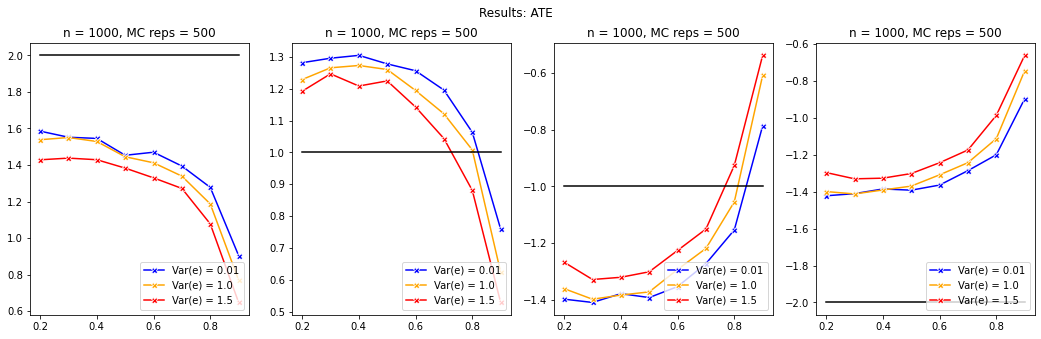

In [22]:
fig, axes = plt.subplots(1,4, figsize=(18, 5))
fig.suptitle('Results: ATE')


#sns.lineplot(ax=axes[0], x=test_sizes, y=df9['MSE1'],  marker='X', dashes = True, color = 'Orange')
for i in range(4):
    sns.lineplot(ax=axes[i], x=test_sizes, y=a1[i],  marker='X', dashes = True, color = 'Blue')
    sns.lineplot(ax=axes[i], x=test_sizes, y=a2[i],  marker='X', dashes = True, color = 'Orange')
    sns.lineplot(ax=axes[i], x=test_sizes, y=a3[i],  marker='X', dashes = True, color = 'Red')
    axes[i].legend(['Var(e) = 0.01', 'Var(e) = 1.0', 'Var(e) = 1.5'], loc='lower right')
    axes[i].title.set_text('n = 1000, MC reps = 500')

sns.lineplot(ax=axes[0], x=test_sizes, y=t1*2, dashes = True, color = 'Black')
sns.lineplot(ax=axes[1], x=test_sizes, y=t1, dashes = True, color = 'Black')
sns.lineplot(ax=axes[2], x=test_sizes, y=t1*-1, dashes = True, color = 'Black')
sns.lineplot(ax=axes[3], x=test_sizes, y=t1*-2, dashes = True, color = 'Black')

#axes[0].set(xlabel='Estimation Sample Proportion', ylabel='MSE (ATE)')
#axes[1].set(xlabel='Estimation Sample Proportion', ylabel='MSE (ATE)')

#fig.savefig("mseate.png")

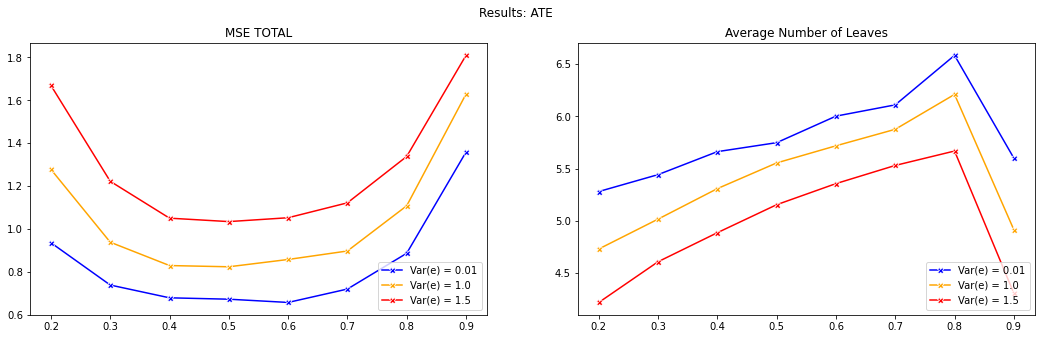

In [23]:
fig, axes = plt.subplots(1,2, figsize=(18, 5))
fig.suptitle('Results: ATE')


#sns.lineplot(ax=axes[0], x=test_sizes, y=df9['MSE1'],  marker='X', dashes = True, color = 'Orange')
for i in range(2):
    sns.lineplot(ax=axes[i], x=test_sizes, y=a1[i+4],  marker='X', dashes = True, color = 'Blue')
    sns.lineplot(ax=axes[i], x=test_sizes, y=a2[i+4],  marker='X', dashes = True, color = 'Orange')
    sns.lineplot(ax=axes[i], x=test_sizes, y=a3[i+4],  marker='X', dashes = True, color = 'Red')
    axes[i].legend(['Var(e) = 0.01', 'Var(e) = 1.0', 'Var(e) = 1.5'], loc='lower right')
axes[0].title.set_text('MSE TOTAL')
axes[1].title.set_text('Average Number of Leaves')



#axes[0].set(xlabel='Estimation Sample Proportion', ylabel='MSE (ATE)')
#axes[1].set(xlabel='Estimation Sample Proportion', ylabel='MSE (ATE)')

#fig.savefig("mseate.png")